<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Multiple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### Task 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [3]:
adver=pd.read_csv('Advertising.csv')

In [4]:
adver.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Task 3: Relationship between Features and Response

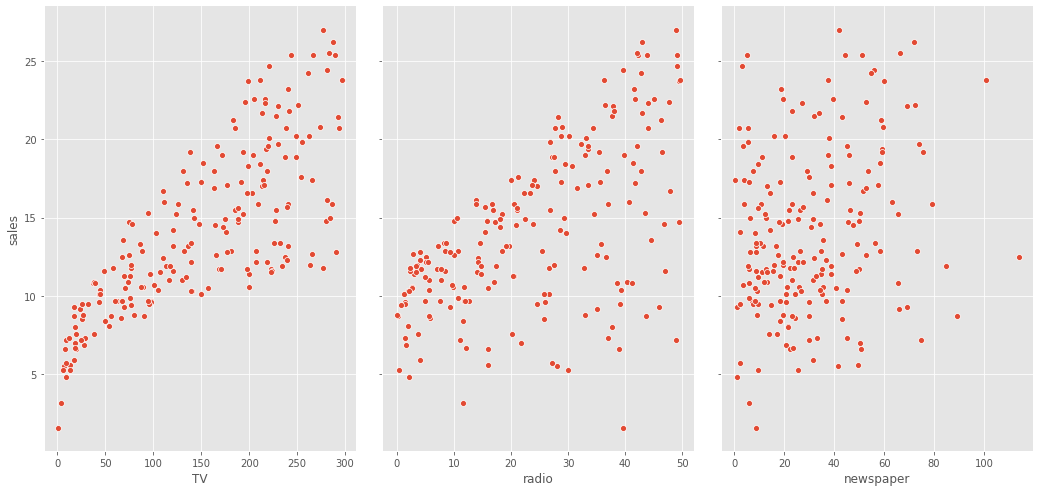

In [5]:
sns.pairplot(adver,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7);

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [6]:
from sklearn.linear_model import LinearRegression

x=adver.iloc[:,:3]
y=adver.iloc[:,-1]
model_1=LinearRegression()
model_1.fit(x,y)
print(model_1.intercept_)
print(model_1.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [7]:
list(zip(['TV','radio','newspaper'],model_1.coef_))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

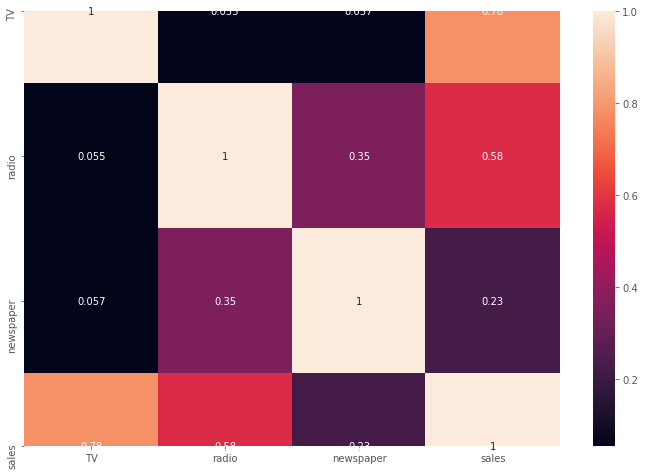

In [10]:
sns.heatmap(adver.corr(),annot=True)

### Task 5: Feature Selection

In [8]:
from sklearn.metrics import r2_score
model_1_pred=model_1.predict(x)
print("r^2 score of Model 1: ",r2_score(y,model_1_pred))

#AS NEWSPAPER IS NOT AFFECTING THE MODEL SO WE REMOVE IT AS A PREDICTOR IN OUR MODEL 2
x=adver.iloc[:,:2]
model_2=LinearRegression()
model_2.fit(x,y)
print("Intercept of model 2 : ",model_2.intercept_)
print("Coefficents of model 2 : ")
print(list(zip(['TV','radio'],model_2.coef_)))
model_2_pred=model_2.predict(x)
print("r^2 score of model 2 : ",r2_score(y,model_2_pred))

r^2 score of Model 1:  0.8972106381789522
Intercept of model 2 :  2.9210999124051362
Coefficents of model 2 : 
[('TV', 0.04575481510107616), ('radio', 0.18799422662030923)]
r^2 score of model 2 :  0.8971942610828956


### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x=adver.iloc[:,:3]
y=adver.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
#CREATING MODEL BY USING ALL THE PREDICTORS ONLY ON TRAIN DATA
model_3=LinearRegression().fit(x_train,y_train)
model_3_pred=model_3.predict(x_test)
print("RMSE : ",np.sqrt(mean_squared_error(y_test,model_3_pred)))
print("R^2 : ",r2_score (y_test,model_3_pred))

RMSE :  1.4046514230328955
R^2 :  0.9156213613792232


In [10]:
x=adver.iloc[:,:2]
y=adver.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
#CREATING MODEL BY USING TV AND RADIO PREDICTORS ON TRAIN DATA
model_4=LinearRegression().fit(x_train,y_train)
model_4_pred=model_4.predict(x_test)
print("RMSE : ",np.sqrt(mean_squared_error(y_test,model_4_pred)))
print("R^2 : ",r2_score (y_test,model_4_pred))

RMSE :  1.3879034699382888
R^2 :  0.9176214942248908


### Task 7: Interaction Effect (Synergy)

In [13]:
adver['interaction']=adver['TV']*adver['radio']
x=adver[['TV','radio','interaction']]
y=adver.sales

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
model_5=LinearRegression().fit(x_train,y_train)
model_5_pred=model_5.predict(x_test)

In [15]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test,model_5_pred)))
print("R^2: ",r2_score(y_test,model_5_pred))

RMSE:  0.7011871137164327
R^2:  0.978973681468126
